In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
file_path="../data/dataset_BreastCancerMETABRIC.csv"

# load the data
data = pd.read_csv(file_path)
print("Dataset loaded successfully")

# size of the dataset
print("The shape of the data: {}".format(data.shape))

Dataset loaded successfully
The shape of the data: (2509, 34)


In [3]:
# display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

In [4]:
# getting the first few rows of the dataset
data.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [5]:
# check for missing values
missing_values=data.isnull().mean()*100
print("Missing values (%):")
print(missing_values[missing_values > 0].sort_values(ascending=False))

Missing values (%):
3-Gene classifier subtype         29.693105
Tumor Stage                       28.736548
Primary Tumor Laterality          25.468314
Cellularity                       23.595058
Type of Breast Surgery            22.080510
Integrative Cluster               21.084097
Hormone Therapy                   21.084097
Radio Therapy                     21.084097
PR Status                         21.084097
Inferred Menopausal State         21.084097
Patient's Vital Status            21.084097
Pam50 + Claudin-low subtype       21.084097
HER2 status measured by SNP6      21.084097
Chemotherapy                      21.084097
HER2 Status                       21.084097
Overall Survival Status           21.044241
Overall Survival (Months)         21.044241
Lymph nodes examined positive     10.601833
Nottingham prognostic index        8.848147
Mutation Count                     6.058191
Tumor Size                         5.938621
Tumor Other Histologic Subtype     5.380630
Relapse Free

#### 1. Columns with 20-30% missing data:
    - 3-Gene classifier sbutype (categorical)
        -- Use Mode imputation or KNN imputation

    - Tumor Stage (categorical)
        -- Impute with Mode

    - Primary Tumor Laterality (categorical)
        -- Impute with Mode or add a placeholder like "Unkown"

    - Cellularity (categorical)
        -- Impute with mode

In [6]:
# filter columns with 20-30% missing values
columns_20_30_missing = missing_values[(missing_values >= 20) & (missing_values < 30)].index
print("Columns with 20%-30% missing data:", columns_20_30_missing.tolist())

Columns with 20%-30% missing data: ['Type of Breast Surgery', 'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'HER2 status measured by SNP6', 'HER2 Status', 'Hormone Therapy', 'Inferred Menopausal State', 'Integrative Cluster', 'Primary Tumor Laterality', 'Overall Survival (Months)', 'Overall Survival Status', 'PR Status', 'Radio Therapy', '3-Gene classifier subtype', 'Tumor Stage', "Patient's Vital Status"]


In [7]:
# One-hot encode categorical columns for correlation analysis
encoded_data = pd.get_dummies(data, drop_first=False)

# compute correlation matrix
correlation_matrix = encoded_data.corr()

# focus on the columns with 20-30% missing data
columns_to_check = ['Type of Breast Surgery', 'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'HER2 status measured by SNP6', 'HER2 Status', 'Hormone Therapy', 'Inferred Menopausal State', 'Integrative Cluster', 'Primary Tumor Laterality', 'Overall Survival (Months)', 'Overall Survival Status', 'PR Status', 'Radio Therapy', '3-Gene classifier subtype', 'Tumor Stage', "Patient's Vital Status"]
encoded_columns_to_check = [col for col in correlation_matrix.columns if any(c in col for c in columns_to_check)]

# Filter correlation matrix for these columns
correlations_of_interest = correlation_matrix[encoded_columns_to_check].loc[encoded_columns_to_check]
correlations_of_interest

,Overall Survival (Months),Tumor Stage,Type of Breast Surgery_Breast Conserving,Type of Breast Surgery_Mastectomy,Cellularity_High,Cellularity_Low,Cellularity_Moderate,Chemotherapy_No,Chemotherapy_Yes,Pam50 + Claudin-low subtype_Basal,...,PR Status_Positive,Radio Therapy_No,Radio Therapy_Yes,3-Gene classifier subtype_ER+/HER2- High Prolif,3-Gene classifier subtype_ER+/HER2- Low Prolif,3-Gene classifier subtype_ER-/HER2-,3-Gene classifier subtype_HER2+,Patient's Vital Status_Died of Disease,Patient's Vital Status_Died of Other Causes,Patient's Vital Status_Living
Overall Survival (Months),1.000000,-0.266567,0.100636,-0.083126,-0.025223,-0.023342,0.031237,0.164267,-0.165092,-0.069898,...,0.146818,0.004015,-0.004575,-0.039664,0.125428,-0.036805,-0.105659,-0.435500,0.034764,0.381050
Tumor Stage,-0.266567,1.000000,-0.175348,0.216075,0.083120,-0.040649,0.020907,-0.185232,0.305734,0.044658,...,-0.052163,-0.106408,0.152408,0.064970,-0.085215,0.046809,0.053849,0.215650,-0.006720,-0.134979
Type of Breast Surgery_Breast Conserving,0.100636,-0.175348,1.000000,-0.630767,0.175058,0.051385,0.085704,0.268841,0.032707,0.082774,...,0.180791,-0.317426,0.582319,0.067783,0.137567,0.118554,-0.012591,0.007635,0.011866,0.282812
Type of Breast Surgery_Mastectomy,-0.083126,0.216075,-0.630767,1.000000,0.172433,0.076327,0.186497,0.295078,0.146381,0.039144,...,0.189789,0.574149,-0.142505,0.180483,0.120150,0.036242,0.135332,0.237096,0.192918,0.035057
Cellularity_High,-0.025223,0.083120,0.175058,0.172433,1.000000,-0.242026,-0.509849,0.231698,0.147143,0.129305,...,0.151331,0.104557,0.236189,0.241024,-0.015324,0.095118,0.084615,0.139660,0.098349,0.140874
Cellularity_Low,-0.023342,-0.040649,0.051385,0.076327,-0.242026,1.000000,-0.197435,0.090104,0.056482,0.051995,...,0.083477,0.094033,0.041335,-0.059094,0.121377,0.080254,0.037145,0.018378,0.040769,0.082374
Cellularity_Moderate,0.031237,0.020907,0.085704,0.186497,-0.509849,-0.197435,1.000000,0.273670,0.009396,-0.023408,...,0.167871,0.131040,0.149846,0.050315,0.206775,0.005948,0.012460,0.114559,0.094430,0.102330
Chemotherapy_No,0.164267,-0.185232,0.268841,0.295078,0.231698,0.090104,0.273670,1.000000,-0.572173,-0.103123,...,0.467998,0.397723,0.173139,0.295184,0.353227,-0.082946,-0.026688,0.079610,0.335449,0.218108
Chemotherapy_Yes,-0.165092,0.305734,0.032707,0.146381,0.147143,0.056482,0.009396,-0.572173,1.000000,0.306325,...,-0.132729,-0.127867,0.307014,-0.060752,-0.128571,0.321689,0.201464,0.231096,-0.158214,0.117642
Pam50 + Claudin-low subtype_Basal,-0.069898,0.044658,0.082774,0.039144,0.129305,0.051995,-0.023408,-0.103123,0.306325,1.000000,...,-0.200939,0.002399,0.125138,-0.138650,-0.176398,0.514664,0.008060,0.099581,-0.037637,0.074266


#### 1. Strong Correlations Detected:
- HER2 Status_Positive and Integrative Cluster_5: Correlation of 0.82.
- 3-Gene classifier subtype_HER2+ and both Integrative Cluster_5 and HER2 Status_Positive: Correlation around 0.82

#### 2. Implications:
- These strong correlations suggest that KNN imputation is a good candidate for imputing missing values in these columns.
- KNN can leverage these relationships to fill missing values more accurately

In [8]:
# Threshold for strong correlations
threshold = 0.7

# Filter correlations above the threshold
strong_correlations = correlations_of_interest[
    (correlations_of_interest.abs() > threshold) & (correlations_of_interest != 1)
]

# Drop rows and columns with all NaN values (no strong correlations)
strong_correlations = strong_correlations.dropna(how='all').dropna(how='all', axis=1)

# Display strong correlations
strong_correlations

,HER2 status measured by SNP6_Gain,HER2 status measured by SNP6_Neutral,HER2 Status_Negative,HER2 Status_Positive,Integrative Cluster_5,3-Gene classifier subtype_HER2+
HER2 status measured by SNP6_Gain,NaN,NaN,NaN,0.707974,NaN,NaN
HER2 status measured by SNP6_Neutral,NaN,NaN,0.768892,NaN,NaN,NaN
HER2 Status_Negative,NaN,0.768892,NaN,NaN,NaN,NaN
HER2 Status_Positive,0.707974,NaN,NaN,NaN,0.820701,0.811356
Integrative Cluster_5,NaN,NaN,NaN,0.820701,NaN,0.815852
3-Gene classifier subtype_HER2+,NaN,NaN,NaN,0.811356,0.815852,NaN


In [13]:
# Melt the correlation matrix to create pairs of variables
strong_corr_pairs = strong_correlations.unstack().reset_index()
strong_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Drop duplicates and NaN values
strong_corr_pairs = strong_corr_pairs.dropna().query("`Variable 1` != `Variable 2`")

# Sort by absolute correlation
strong_corr_pairs = strong_corr_pairs.sort_values(by="Correlation", key=abs, ascending=False)

# Display the top correlations
strong_corr_pairs.head(10)

,Variable 1,Variable 2,Correlation
22,HER2 Status_Positive,Integrative Cluster_5,0.820701
27,Integrative Cluster_5,HER2 Status_Positive,0.820701
29,Integrative Cluster_5,3-Gene classifier subtype_HER2+,0.815852
34,3-Gene classifier subtype_HER2+,Integrative Cluster_5,0.815852
23,HER2 Status_Positive,3-Gene classifier subtype_HER2+,0.811356
33,3-Gene classifier subtype_HER2+,HER2 Status_Positive,0.811356
8,HER2 status measured by SNP6_Neutral,HER2 Status_Negative,0.768892
13,HER2 Status_Negative,HER2 status measured by SNP6_Neutral,0.768892
3,HER2 status measured by SNP6_Gain,HER2 Status_Positive,0.707974
18,HER2 Status_Positive,HER2 status measured by SNP6_Gain,0.707974


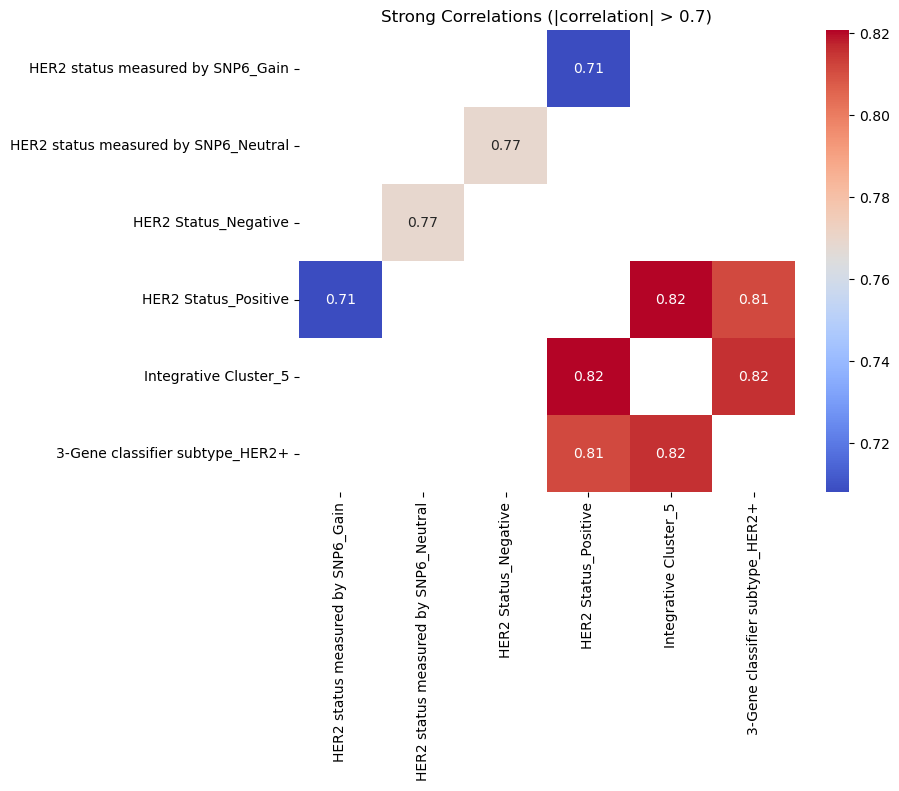

In [10]:
# Visualize only strong correlations in a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(strong_correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Strong Correlations (|correlation| > 0.7)")
plt.show()

Using columns like 'Integrative Cluster_5' and HER2 Status_Positive to predict the missing values in 3-Gene classifier subtype_HER2+